<a href="https://colab.research.google.com/github/AnanyaSharma2/FEATURE_ENGINEERING/blob/main/TSNE/TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("/content/bank_note_data.csv")

In [22]:
df.sample(5)

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
672,2.316400,-2.62800,3.1529,-0.08622,0
533,0.045304,6.73340,1.0708,-0.93320,0
39,3.480500,9.70080,-3.7541,-3.43790,0
715,3.491600,8.57090,-3.0326,-0.59182,0
856,0.242610,0.57318,-1.9402,0.44007,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [24]:
df['Class'].unique()

array([0, 1])

In [25]:
features = list(df.columns[:-1])
target =df.columns[-1]

In [26]:
features

['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy']

In [27]:
target

'Class'

# **Scaling **

In [28]:
from sklearn.preprocessing import StandardScaler

In [30]:
data = df.copy()
sc = StandardScaler()
data[features]= sc.fit_transform(data[features])

In [32]:
df.head(3)

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


In [34]:
data.head(3)

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0


# **TSNE**

In [35]:
from sklearn.manifold import TSNE

In [37]:
tsne = TSNE(learning_rate= 500,n_components=2)
x_tane = tsne.fit_transform(data[features])

In [39]:
x_tane

array([[-28.493004, -27.080688],
       [-26.30679 , -30.578669],
       [ 36.623745, -30.180672],
       ...,
       [ 59.827206,  15.357785],
       [ 51.825462,  19.377888],
       [ 17.83504 ,  34.259968]], dtype=float32)

In [41]:
y = data[target]
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

Text(0, 0.5, '2_Dimension')

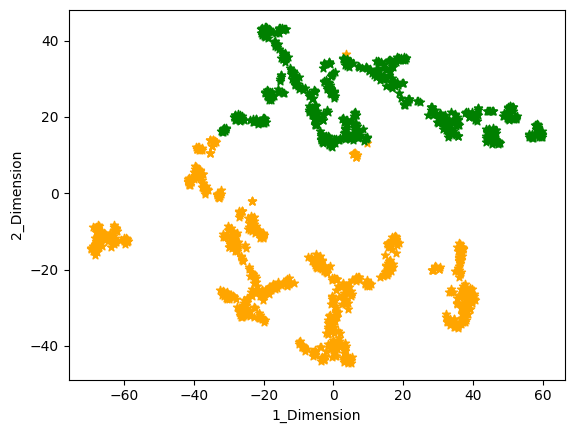

In [49]:
plt.scatter(x_tane[np.where(y==0), 0],x_tane[np.where(y==0), 1],color='orange',marker ='*')
plt.scatter(x_tane[np.where(y==1),0],x_tane[np.where(y==1),1],color='green',marker='*')
plt.xlabel("1_Dimension")
plt.ylabel("2_Dimension")